In [1]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import norm,normaltest, probplot

import pandas as pd
import sys, os

In [2]:
plt.rcParams["figure.dpi"] = 150
plt.rcParams["figure.figsize"] = (4,3)

params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
def standartize(arr):
    return (arr - np.mean(arr))/np.std(arr)

In [4]:
df = pd.read_csv("beta-omega-plot-data-ensemble-5.1.csv")

In [5]:
def f_beta(x):
    return 3 * (1 - x**2)/(2 + np.sqrt(1 + 3 * x**2))
def f_omega(x):
    return np.sqrt(1 + 3 * x**2) - 1

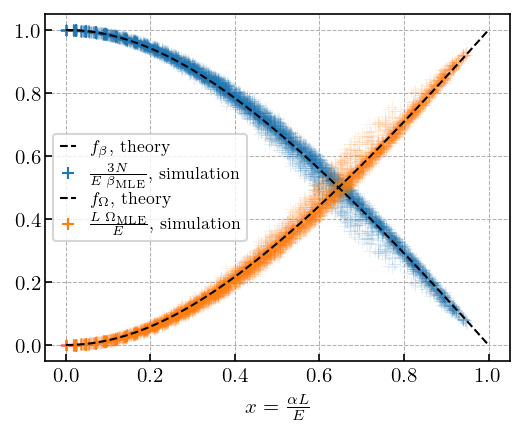

In [20]:
xs = np.linspace(0,1,100)
alpha=0.1

rasterized = True

ax = plt.gca()

plt.plot(xs, f_beta(xs), "k--", lw=1, label=r"$f_\beta$, theory")
plt.scatter(df["x"], df["y_beta"], marker="+", s=30,lw=0.5, 
            alpha=alpha, c=colors[0],label=r"$\frac{3 N}{ E \;\beta_\mathrm{MLE} }$, simulation",
           rasterized=rasterized)

plt.plot(xs, f_omega(xs), "k--", lw=1, label="$f_\Omega$, theory")
plt.scatter(df["x"], df["y_omega"], marker="+", s=30,lw=0.5, 
            alpha=alpha, c=colors[1], label=r"$\frac{L\;\Omega_\mathrm{MLE} }{E}$, simulation",
           rasterized=rasterized)

ax.tick_params(axis="x", which="both", direction="in",pad=3)
ax.tick_params(axis="y", which="both", direction="in",pad=1.5)
plt.xlabel(r"$x=\frac{\alpha L}{E}$")

# plt.ylabel(r"$\frac{3 N}{ E \beta_{MLE} }$  and  $\frac{\Omega_{MLE} L}{E}$")
# plt.legend()

handles, labels = ax.get_legend_handles_labels()
handles[1] = plt.scatter([], [], marker='+',s=30,lw=1, c=colors[0])
handles[3] = plt.scatter([], [], marker='+',s=30,lw=1, c=colors[1])

# handles[1].set_linewidth(3)

plt.legend(handles, labels, prop={'size': 8}, labelspacing=0.3, handlelength=1)

ax.set_axisbelow(True)
plt.grid(ls='--', lw=0.5)

plt.savefig(f"connection-to-thermodynamics-{rasterized}.pdf", dpi=100, bbox_inches='tight')

In [78]:
import pickle
with open("QQ-data.pkl", "rb") as f:
    plot_data = pickle.load(f)

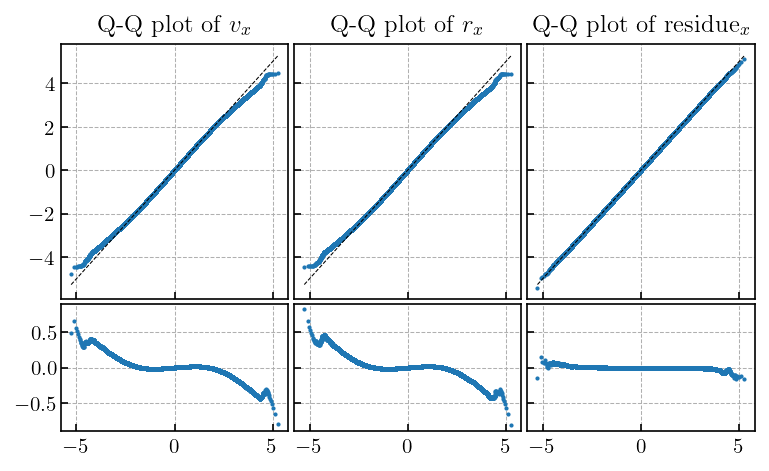

In [81]:
from matplotlib import gridspec

sp=1
i_ = 0
j_ = 0
rasterized = True

gs = gridspec.GridSpec(2, 3, width_ratios=[1,1, 1], height_ratios=[2,1]) 
# gs = gridspec.GridSpec(2, 3)

plt.figure(figsize=(5,3))
for points, title in zip(*plot_data): 
    
    ((osm, osr), (slope, intercept, _r)) = probplot(points, dist="norm",)
    
    ax = plt.subplot(gs[i_], sharex=plt.subplot(gs[0]), sharey=plt.subplot(gs[0]));i_+=1
    plt.scatter(osm[::sp], osr[::sp], s=1, rasterized=rasterized)
    plt.plot(osm[::sp], osm[::sp] * slope + intercept, ls="--", c="k", lw=0.51)
    plt.title("Q-Q plot of " + title);
#     ax.axis('equal')
    
    ax.set_axisbelow(True)
    plt.grid(ls='--', lw=0.5)   
    
    ax.tick_params(axis="x", which="both", direction="in",pad=3)
    ax.tick_params(axis="y", which="both", direction="in",pad=2.5)
    if i_ > 1:
        plt.setp(ax.get_yticklabels(), visible=False)

    ax.xaxis.set_ticklabels([])
        
    ax = plt.subplot(gs[3 + j_], sharex=plt.subplot(gs[3]), sharey=plt.subplot(gs[3]));j_+=1
#     plt.title("diff w.r.t. slope")
    plt.scatter(osm[::sp], osr[::sp]-(osm[::sp] * slope + intercept), s=1, rasterized=rasterized)
    
    ax.set_axisbelow(True)
    plt.grid(ls='--', lw=0.5)    
    
    ax.tick_params(axis="x", which="both", direction="in",pad=3)
    ax.tick_params(axis="y", which="both", direction="in",pad=1.5)
    if j_ > 1:
        plt.setp(ax.get_yticklabels(), visible=False)

plt.tight_layout(pad=0.2)
# plt.subplots_adjust(bottom=0, right=0, top=1)
plt.savefig(f"QQ-plots.pdf", dpi=300, bbox_inches='tight')

In [35]:
gs[0]

GridSpec(2, 3, height_ratios=[2, 1])[0:1, 0:1]